# <font color='Red'>PCA : Principle Component Analysis </font>
A normal human can not visualize more than 3 dimensions but when we are solving real-life machine learning problems we have to deal with more than 3 dimensions. So the concept of dimensionality reduction came into the picture, PCA is all about reducing higher dimensions to lower so that we can easily analyze the dataset.  So let's apply PCA  on MNIST dataset which is of 784 dimensions. 

### Download Dataset from : https://www.kaggle.com/c/digit-recognizer/data
# <font color='Red'>Data Description</font>
The data files train.csv and test.csv contain grey-scale images of hand-drawn digits, from zero through nine.Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
# Dataset is in same folder , direct filename can be given 
# if dataset is at differnt location, provide compelete path
data = pd.read_csv('./MNIST_train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# printing shape of dataset
data.shape

(42000, 785)

In [4]:
# MNIST dataset have collection of 42000, 28x28 grey-scale images
# Converting images to vectors we get 748x1 vector
# First 784 values in data in pixel values and last is label
#print(data.columns)
# Store labels into another variable
labels = data['label']
labels.shape
print(" Label is vector of size 42000")

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
 Label is vector of size 42000


In [5]:
# Remove label columns from dataset
# axis=1 is for column and axis=0 for row
data = data.drop(["label"],axis=1)
print(data.shape)
print("last column ie. Label is removed")
print("data is 42000 rows and 784 features datamatrix")

(42000, 784)
last column ie. Label is removed
data is 42000 rows and 784 features datamatrix


In [6]:
print("Size of Independent data : ",data.shape)
print("Size of dependent data : ",labels.shape)

Size of Independent data :  (42000, 784)
Size of dependent data :  (42000,)


# Let's display few numbers

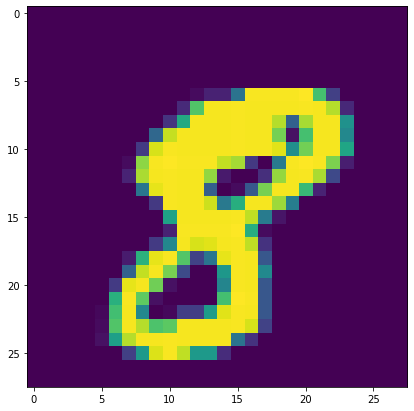

8


In [12]:
plt.figure(figsize=(7,7))
# Change the index values to get differnt results
# index can be from 0 to 41999
index = 10
# Image had been converted to vector, now again reshaping it as 28x28 grid
digit_image = data.iloc[index].as_matrix().reshape(28,28)
plt.imshow(digit_image)
plt.show()
# Printing correct label of the image
print(labels[index])

We have analyzed the MNIST dataset, now let's apply PCA

# <font color='Red'>PCA : Principle Component Analysis </font>
Let's learn PCA now